# **Análisis de la Tasa de Diabetes**

In [2]:
# Preparación para lectura del archivo.
import pandas as pd
import matplotlib.pyplot as plt

diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Análisis de Variables
A continuación, se analizará el comportamiento de las variables "**BloodPressure**" y "**SkinThickness**"...

### Embarazos

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Pregnancies
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB

DATOS IMPORTANTES ---> (mmHg)
    Promedio: 3.8451
    Mediana : 3.0
    Desv.   : 3.3696
    Max: 17, Min: 0



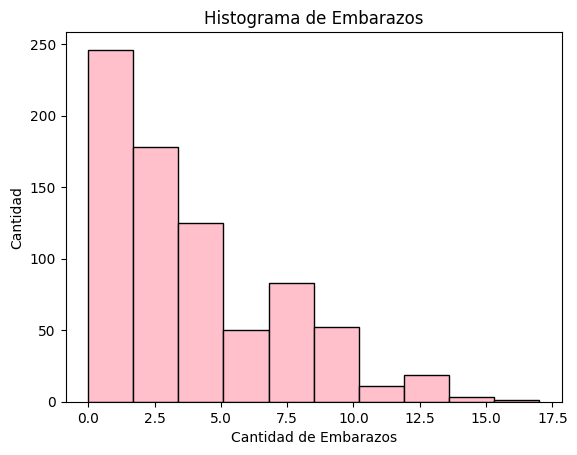

In [ ]:
embarazos = diabetes["Pregnancies"]
embarazos.info()

promedio_em   = embarazos.mean()
mediana_em    = embarazos.median()
desviacion_em = embarazos.std()

print(f"""
DATOS IMPORTANTES ---> (mmHg)
    Promedio: {promedio_em.round(4)}
    Mediana : {mediana_em}
    Desv.   : {desviacion_em.round(4)}
    Max: {embarazos.max().round(4)}, Min: {embarazos.min().round(4)}
""")

fig, ax = plt.subplots()
n, bins, patches = ax.boxplot(embarazos, facecolor="pink", edgecolor="black", linewidth=1, patch_artist=True)

ax.set_xlabel("Cantidad de Embarazos")
ax.set_ylabel("Cantidad")

plt.title("Boxplot de Embarazos")
plt.show(); 

### Niveles de Glucosa

Información de la Glucosa ---
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


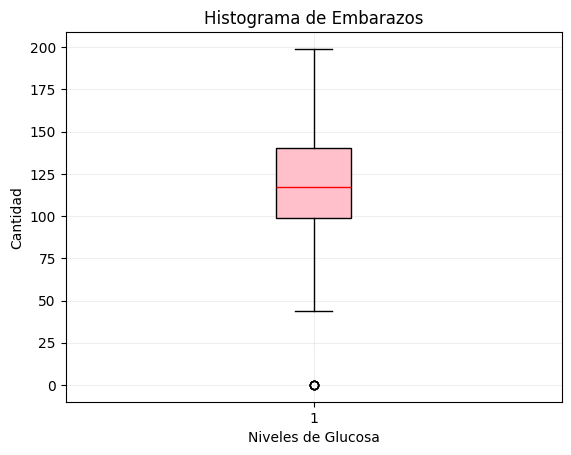

In [25]:
glucosa = diabetes["Glucose"]

print("Información de la Glucosa ---")
print(glucosa.describe())

fig, ax = plt.subplots()
ax.boxplot(glucosa, vert=True, patch_artist=True, boxprops=dict(facecolor="pink", color="black"), medianprops=dict(color="red"))

ax.set_xlabel("Niveles de Glucosa")
ax.set_ylabel("Cantidad")

plt.title("Histograma de Embarazos")
plt.grid(alpha=0.2); plt.show()


### Presión de la Sangre

In [4]:
presion_sangre = diabetes["BloodPressure"]
presion_sangre.info()

promedio_ps   = presion_sangre.mean()
mediana_ps    = presion_sangre.median()
desviacion_ps = presion_sangre.std()

print(f"""
DATOS IMPORTANTES ---> (mmHg)
    Promedio: {promedio_ps.round(4)}
    Mediana : {mediana_ps}
    Desv.   : {desviacion_ps.round(4)}
""")

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: BloodPressure
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB

DATOS IMPORTANTES ---> (mmHg)
    Promedio: 69.1055
    Mediana : 72.0
    Desv.   : 19.3558



In [5]:
# Calcular la cantidad de personas hipotensas (x < 60 mmHg)
hipotensos = presion_sangre[presion_sangre < 60]
hipotensos.value_counts()

BloodPressure
0     35
58    21
50    13
56    12
54    11
52    11
48     5
44     4
30     2
55     2
46     2
40     1
24     1
38     1
Name: count, dtype: int64

In [37]:
# Calcular la cantidad de personas hipertensas/elevadas (x > 120 mmHg)
hipertensos = presion_sangre[presion_sangre > 120]
hipertensos.value_counts()

BloodPressure
122    1
Name: count, dtype: int64

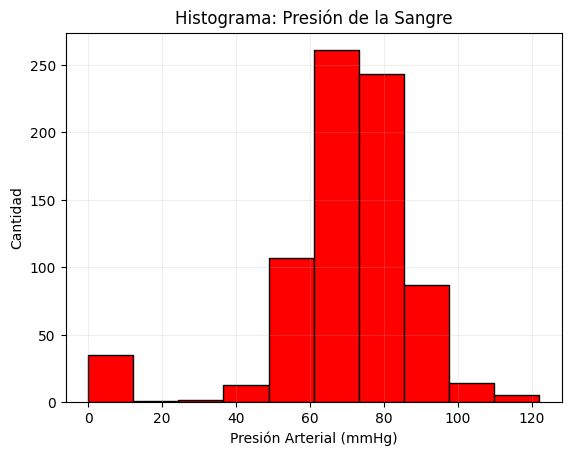

In [14]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(presion_sangre, facecolor="red", edgecolor="black", linewidth=1)

ax.set_xlabel("Presión Arterial (mmHg)")
ax.set_ylabel("Cantidad")

plt.title("Histograma: Presión de la Sangre")
plt.grid(alpha=0.2); plt.show()

### Grosor de la Piel

In [38]:
grosor_piel = diabetes["SkinThickness"]
grosor_piel.info()

promedio_gp   = grosor_piel.mean()
mediana_gp    = grosor_piel.median()
desviacion_gp = grosor_piel.std()

print(f"""
DATOS IMPORTANTES ---> (mmHg)
    Promedio: {promedio_gp.round(4)}
    Mediana : {mediana_gp}
    Desv.   : {desviacion_gp.round(4)}
""")

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: SkinThickness
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB

DATOS IMPORTANTES ---> (mmHg)
    Promedio: 20.5365
    Mediana : 23.0
    Desv.   : 15.9522



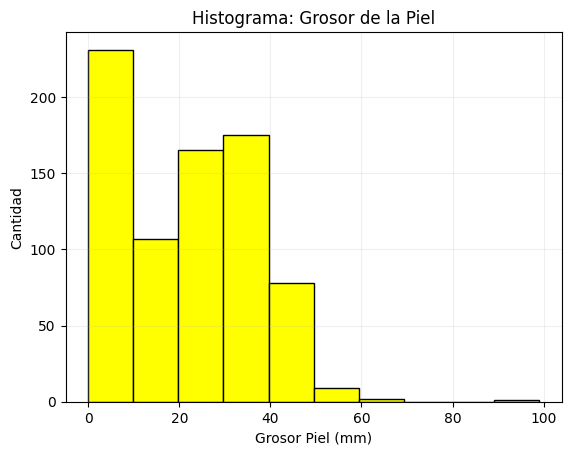

In [39]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(grosor_piel, facecolor="yellow", edgecolor="black", linewidth=1)

ax.set_xlabel("Grosor Piel (mm)")
ax.set_ylabel("Cantidad")

plt.title("Histograma: Grosor de la Piel")
plt.grid(alpha=0.2); plt.show()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
679
80
9


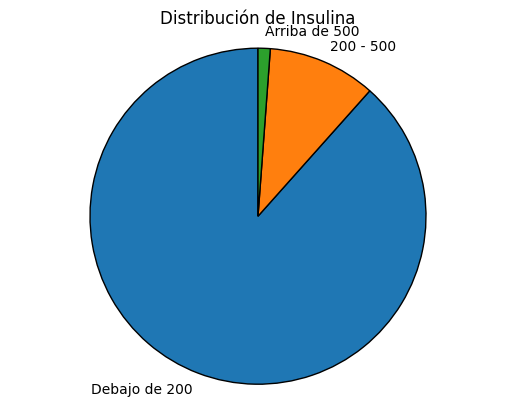

In [42]:
insulina = diabetes["Insulin"]
insulina = insulina.dropna()
print(insulina.describe())

distribucion_ins = [
    insulina[insulina < 200].count(),
    insulina[(insulina >= 200) & (insulina < 500)].count(),
    insulina[insulina >= 500].count()
]

for ins in distribucion_ins:
    print(ins)

labels = ["Debajo de 200", "200 - 500", "Arriba de 500"]

fig, ax = plt.subplots()
ax.pie(distribucion_ins,
    labels=labels,
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

ax.axis("equal")
plt.title("Distribución de Insulina")
plt.show()

### BMI

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


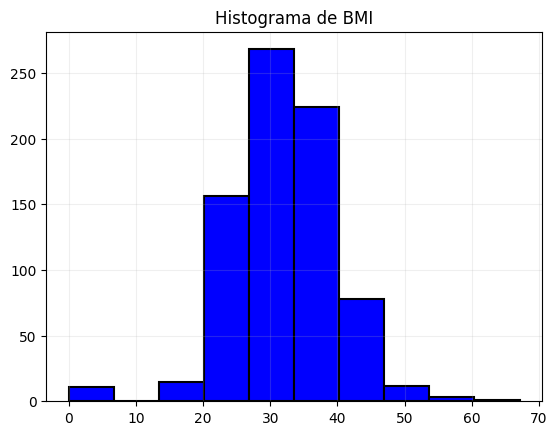

In [44]:
bmi = diabetes["BMI"]
bmi.dropna()
print(bmi.describe())

fig, ax = plt.subplots()
ax.hist(bmi, facecolor="blue", edgecolor="black", linewidth=1.5)

plt.title("Histograma de BMI")
plt.grid(alpha=0.2); plt.show()

### Función de Diabetes Pedigree

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


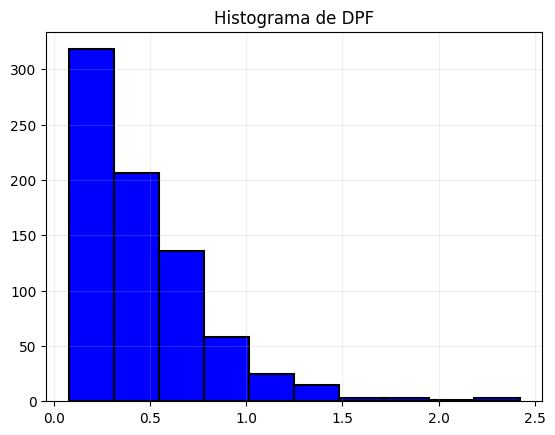

In [45]:
dpf = diabetes["DiabetesPedigreeFunction"]
dpf.dropna()
print(dpf.describe())

fig, ax = plt.subplots()
ax.hist(dpf, facecolor="blue", edgecolor="black", linewidth=1.5)

plt.title("Histograma de DPF")
plt.grid(alpha=0.2); plt.show()

### Age

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64


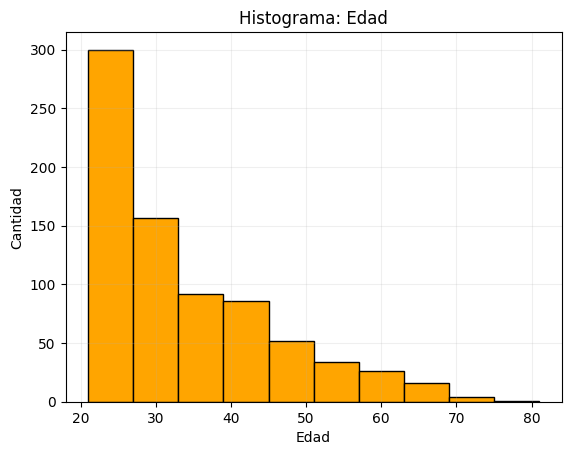

In [47]:
edades = diabetes["Age"]
print(edades.describe())

fig, ax = plt.subplots()
ax.hist(edades, facecolor="orange", edgecolor="black", linewidth=1)

ax.set_xlabel("Edad")
ax.set_ylabel("Cantidad")

plt.title("Histograma: Edad")
plt.grid(alpha=0.2); plt.show()

### Respuesta

count      2.000000
mean     384.000000
std      164.048773
min      268.000000
25%      326.000000
50%      384.000000
75%      442.000000
max      500.000000
Name: count, dtype: float64


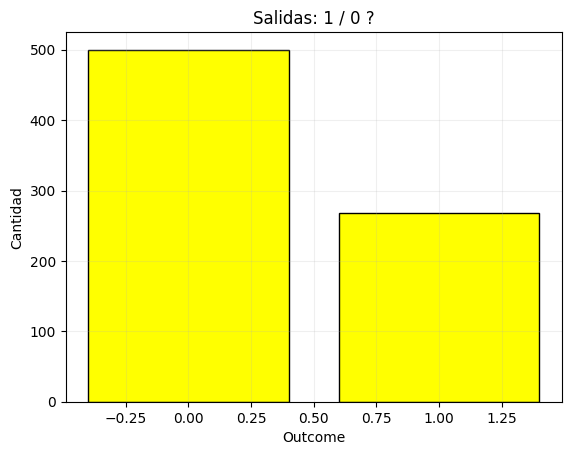

In [56]:
respuestas = diabetes["Outcome"].value_counts()
print(respuestas.describe())

fig, ax = plt.subplots()
ax.bar(respuestas.index, respuestas.values, facecolor="yellow", edgecolor="black")

ax.set_xlabel("Outcome")
ax.set_ylabel("Cantidad")

plt.title("Salidas: 1 / 0 ?")
plt.grid(alpha=0.2); plt.show()

## Conclusiones

A partir de las gráficas y la investigación de los datos, se pueden ver patrones curiosos en algunos de estos. Por ejemplo, en la sección de "Presión de Sangre" se puede observar que hay un residuo de personas que presentan una presión sanginuea menor de la recomendada.